<a href="https://colab.research.google.com/github/iceaiai/CS-team/blob/main/September_9th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hyperspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 600.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.2/976.2 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 41.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30000 (\N{CJK UNIFIED IDEOGRAPH-7530}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


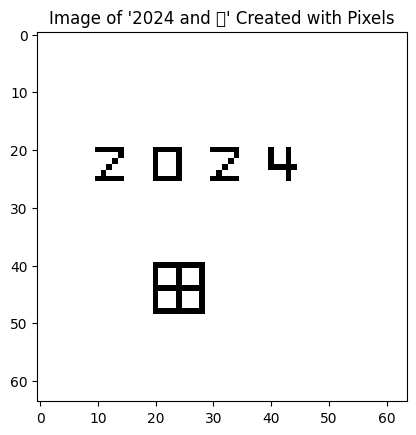

In [18]:
import numpy as np
import matplotlib.pyplot as plt

image_size = (64, 64)
img_array = np.ones(image_size) * 255  # Create a white background

# Function to set pixels for a number
def draw_number(img, number_array, top_left):
    for i, row in enumerate(number_array):
        for j, pixel in enumerate(row):
            if pixel == 1:
                img[top_left[0] + i, top_left[1] + j] = 0


number_2 = np.array([[1, 1, 1, 1, 1],
           [0, 0, 0, 0, 1],
           [0, 0, 0, 1, 0],
           [0, 0, 1, 0, 0],
           [0, 1, 0, 0, 0],
           [1, 1, 1, 1, 1],
           [0, 0, 0, 0, 0]])

number_0 = np.array([[1, 1, 1, 1, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 0, 0, 0, 1],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0]])

number_4 = np.array([[1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 0, 0, 1, 0],
            [1, 1, 1, 1, 1],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0]])
letter_tian = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 0, 0, 0, 1, 0, 0, 0, 1],
             [1, 1, 1, 1, 1, 1, 1, 1, 1]])


draw_number(img_array, number_2, (20, 10))
draw_number(img_array, number_0, (20, 20))
draw_number(img_array, number_2, (20, 30))
draw_number(img_array, number_4, (20, 40))
draw_number(img_array, letter_tian, (40, 20))

# Display the image
plt.imshow(img_array, cmap='gray')
plt.title("Image of '2024 and 'tian' Created with Pixels")
plt.show()


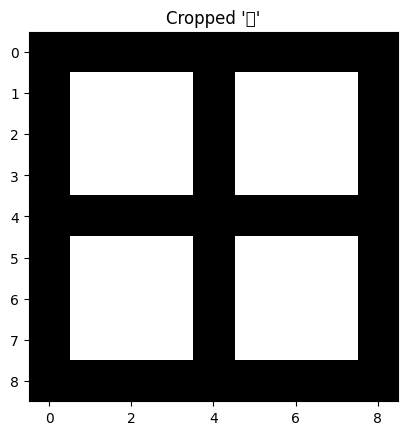

In [19]:
cropped_tian = img_array[40:49, 20:29]  # Adjust the cropping region as needed

# Display the cropped "田"
plt.imshow(cropped_tian, cmap='gray')
plt.title("Cropped 'tian'")
plt.show()

# 1D Gaussian
$$
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
$$

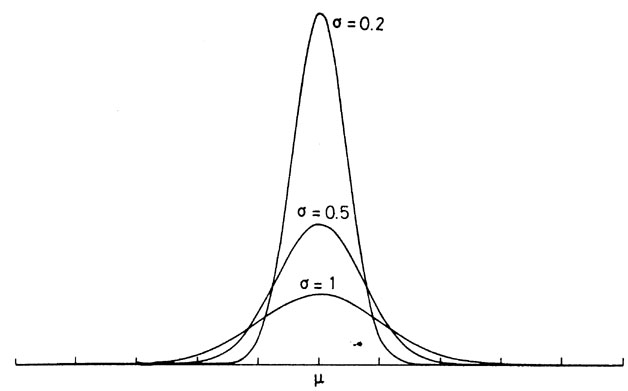

In [35]:
from IPython.display import display, Math

gaussian_eq = r'''
f(x) = a \cdot e^{-\frac{{(x - \mu)^2}}{{2\sigma^2}}}
'''
display(Math(gaussian_eq))
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def gaussian(x, height, mu, sigma):
    return height * np.exp(-((x - mu)**2) / (2 * sigma**2))

def update_plot(height, mu, sigma):
    x = np.linspace(-10, 10, 400)
    y = gaussian(x, height, mu, sigma)
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f"Gaussian Curve: $\mu={mu}, \sigma={sigma}, a={height}$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.show()

# Create interactive widgets for height, mean (mu), and sigma
height_slider = widgets.FloatSlider(value=1, min=0.1, max=10, step=0.1, description='Height (a)')
mu_slider = widgets.FloatSlider(value=0, min=-5, max=6, step=0.1, description='Mean (μ)')
sigma_slider = widgets.FloatSlider(value=1, min=0.1, max=7, step=0.1, description='Sigma (σ)')

# Display the widgets and the plot
ui = widgets.VBox([height_slider, mu_slider, sigma_slider])
out = widgets.interactive_output(update_plot, {'height': height_slider, 'mu': mu_slider, 'sigma': sigma_slider})

display(ui, out)


<IPython.core.display.Math object>

Output()

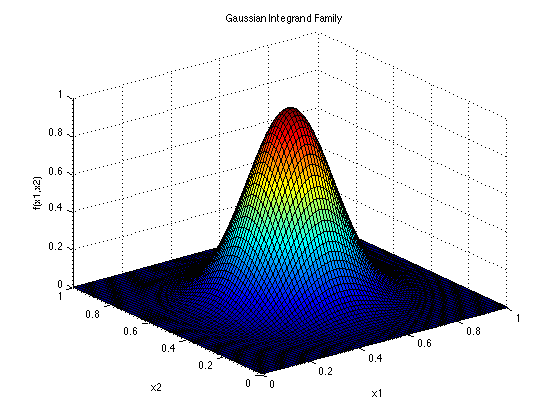

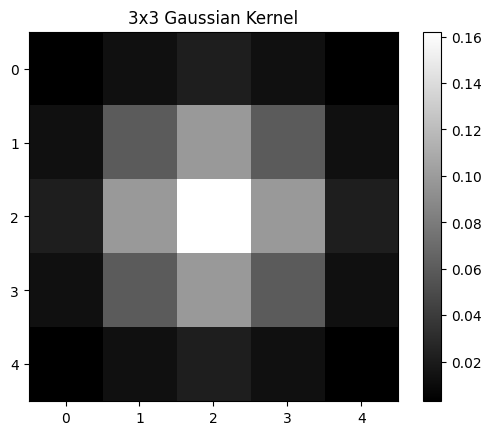

In [21]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_kernel(size, sigma=1):
    ax = np.linspace(-(size - 1) / 2., (size - 1) / 2., size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel / np.sum(kernel)


gaussian_kernel_10 = gaussian_kernel(5, sigma=1)


plt.imshow(gaussian_kernel_10, cmap='gray')
plt.title("10x10 Gaussian Kernel")
plt.colorbar()
plt.show()
